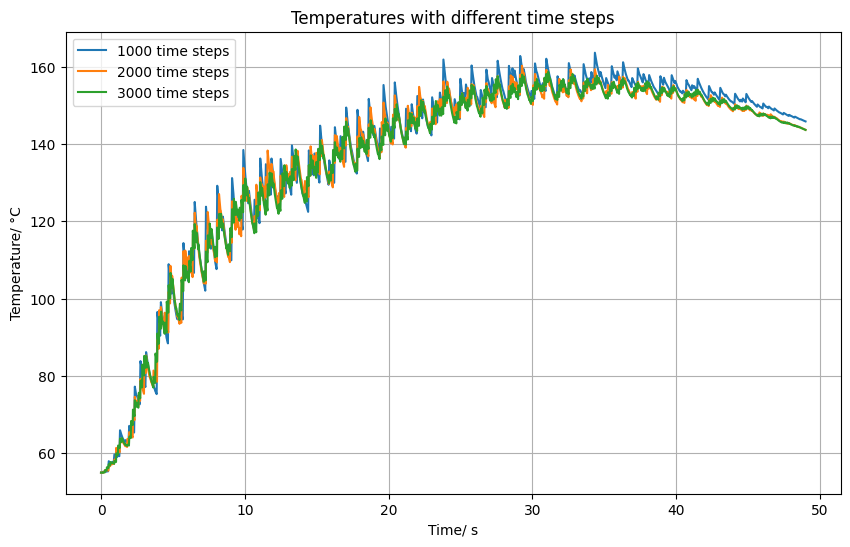

In [6]:
import os
import shutil
import pandas as pd
import re
import matplotlib.pyplot as plt

# Source and destination directories
source_dir = '/home/yanjun/Documents/FEM_results/time-step'
destination_dir = '/home/yanjun/Documents/FEniCSx/Projecct/Data/time-step'

# Function to collect CSV files recursively
def collect_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files


# Collect all CSV files from the destination directory
csv_files = collect_csv_files(destination_dir)

def extract_time_step(file_name):
    label = file_name.split("s-")[1].split("-")[0]  # Extract the part after "c-"
    return label
  

csv_files.sort(key=lambda x: extract_time_step(os.path.basename(x)))


plt.figure(figsize=(10, 6))
for csv_file in csv_files:
    # Extract label from file name
    label = os.path.basename(csv_file).split("s-")[1].split("-")[0]  # Extract the part after "s-"
    label = f"{label} time steps"  # Convert "0.2" to "20% contact area"
    
    # Read CSV file
    df = pd.read_csv(csv_file)
    
    # Extract data
    time_data = df.iloc[:, 1]  # Assuming time is in the second column (index 1)
    temperature_data = df.iloc[:, 2]  # Assuming temperature is in the third column (index 2)
    
    # Plot data
    plt.plot(time_data, temperature_data, label=label)

plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('Temperatures with different time steps')
plt.legend()
plt.grid(True)
plt.show()